In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import seaborn as sns
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [2]:
data = pd.read_csv(".../train.csv")
check = pd.read_csv(".../test.csv")

In [3]:
data.shape
#train - P_ID <= 891

(891, 12)

In [4]:
check.shape
#test > P_ID > 891

(418, 11)

In [5]:
data = data.append(check)
data.shape

(1309, 12)

In [6]:
data.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
853,16.0,D28,S,39.4000,"Lines, Miss. Mary Conover",1,854,1,female,0,1.0,PC 17592
850,4.0,NaN,S,31.2750,"Andersson, Master. Sigvard Harald Elias",2,851,3,male,4,0.0,347082
289,NaN,NaN,S,8.0500,"Ford, Mr. Arthur",0,1181,3,male,0,NaN,A/5 1478
176,NaN,NaN,S,25.4667,"Lefebre, Master. Henry Forbes",1,177,3,male,3,0.0,4133
302,43.0,NaN,S,21.0000,"Phillips, Mr. Escott Robert",1,1194,2,male,0,NaN,S.O./P.P. 2
145,19.0,NaN,S,36.7500,"Nicholls, Mr. Joseph Charles",1,146,2,male,1,0.0,C.A. 33112
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053
56,35.0,NaN,S,7.8958,"Cor, Mr. Bartol",0,948,3,male,0,NaN,349230
747,30.0,NaN,S,13.0000,"Sinkkonen, Miss. Anna",0,748,2,female,0,1.0,250648
421,21.0,NaN,Q,7.7333,"Charters, Mr. David",0,422,3,male,0,0.0,A/5. 13032


In [7]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [8]:
data.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [9]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [10]:
#data.loc((data["Ticket"] == "CA. 2343"), ["Name", "Parch", "SibSp"] )
data.loc[(data["Ticket"]=="11751"),]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
248,37.0,D35,S,52.5542,"Beckwith, Mr. Richard Leonard",1,249,1,male,1,1.0,11751
871,47.0,D35,S,52.5542,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,872,1,female,1,1.0,11751


# EXPLORATION 

In [11]:
data['Dead']= 1-data['Survived']

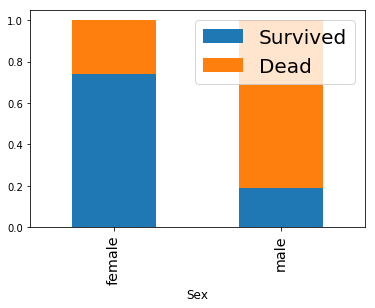

In [12]:
#Plotting Male Vs Female Survival chances
data.groupby('Sex').agg('mean')[['Survived', 'Dead']].plot(kind ='bar', stacked = True)

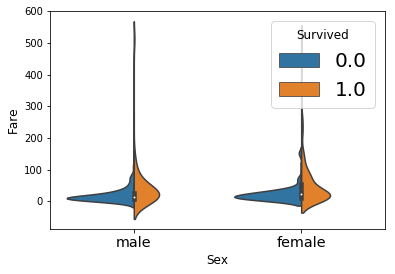

In [13]:
#Fare wrt sex
sns.violinplot(x='Sex', y='Fare', hue='Survived', data=data, split=True);

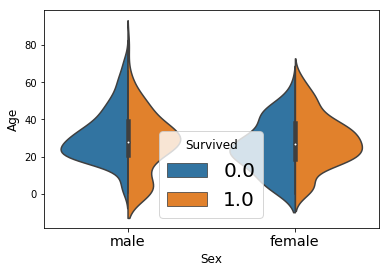

In [14]:
#Age with Sex
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True);

# Data Cleaning

In [15]:
#splitting Cabin and Last names 
data["Last_Name"], data["First_Name"] = data["Name"].str.split(",",1).str
data["Salutation"], data["Rest"] = data["First_Name"].str.split(". ", 1).str
data["Deck"] = data["Cabin"].str[:1]
data['Salutation'] = data['Salutation'].str.strip()
data2 = data.drop(columns=['First_Name', 'Rest', 'Name', 'Cabin'])
data2.sample(10)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Dead,Last_Name,Salutation,Deck
26,NaN,C,7.2250,0,27,3,male,0,0.0,2631,1.0,Emir,Mr,NaN
739,NaN,S,7.8958,0,740,3,male,0,0.0,349218,1.0,Nankoff,Mr,NaN
86,16.0,S,34.3750,3,87,3,male,1,0.0,W./C. 6608,1.0,Ford,Mr,NaN
418,30.0,S,13.0000,0,419,2,male,0,0.0,28228,1.0,Matthews,Mr,NaN
429,32.0,S,8.0500,0,430,3,male,0,1.0,SOTON/O.Q. 392078,0.0,Pickard,Mr,E
304,NaN,Q,7.7500,0,1196,3,female,0,NaN,383123,NaN,McCarthy,Miss,NaN
98,20.0,S,7.8542,0,990,3,female,0,NaN,347471,NaN,Braf,Miss,NaN
44,45.0,S,52.5542,0,936,1,female,1,NaN,11753,NaN,Kimball,Mrs,D
773,NaN,C,7.2250,0,774,3,male,0,0.0,2674,1.0,Elias,Mr,NaN
114,63.0,S,221.7792,0,1006,1,female,1,NaN,PC 17483,NaN,Straus,Mrs,C


In [16]:
#m = {"Miss":  ['Ms ', 'Mlle ','Mme', 'Dona', 'Lady'] , "Officer": ['Capt', 'Col','Major', 'Dr', 'Rev','Don','Sir','Jonkheer','the Countess']}
#m2 = {v: k for k,vv in m.items() for v in vv}
#m2

In [17]:
data2['Salutation'] = data2['Salutation'].map(lambda x: 'Miss' if x in ['Ms', 'Mlle','Mme', 'Dona'] else x)
data2['Salutation'] = data2['Salutation'].map(lambda x: 'Officer' if x in ['Capt', 'Col','Major', 'Dr', 'Rev'] else x)
data2['Salutation'] = data2['Salutation'].map(lambda x: 'Royalty' if x in ['Don','Sir','Jonkheer','th','Lady'] else x)
data2['Salutation'].value_counts()

Mr         757
Miss       266
Mrs        197
Master      61
Officer     23
Royalty      5
Name: Salutation, dtype: int64

In [18]:
#print(data2.groupby('Deck')[['Survived']].mean()) 
#print(data2.groupby('Deck')[['Survived']].count())

In [19]:
#print(data2.groupby('Salutation')[['Survived']].mean())
#print(data2.groupby('Salutation')[['Survived']].count())

In [20]:
data2['Family'] = data2['SibSp'] + data2['Parch']+1
data2.head()
data2['Single'] = data2['Family'].map(lambda x: 1 if x == 1 else 0)
data2['Small_Family'] = data2['Family'].map(lambda x: 1 if 2 <= x <= 4 else 0)
data2['Big_Family'] = data2['Family'].map(lambda x: 1 if x > 4 else 0)
data2['Big_Family'].sum()

82

In [21]:
data2['Ticket'] = data2['Ticket'].str.replace('/','')
data2['Ticket'] = data2['Ticket'].str.replace('.','')
data2['Ticket_pref'] = data2['Ticket'].str.split(" ",1).str[0]
data2['Ck'] = data2['Ticket'].str.isnumeric()

data2['Ticket_pref'] = np.where(data2['Ck'] ==True, 'XXX', data2['Ticket_pref'])
data2 = data2.drop(columns='Ck')
data2.head()


,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Dead,Last_Name,Salutation,Deck,Family,Single,Small_Family,Big_Family,Ticket_pref
0,22.0,S,7.2500,0,1,3,male,1,0.0,A5 21171,1.0,Braund,Mr,NaN,2,0,1,0,A5
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,0.0,Cumings,Mrs,C,2,0,1,0,PC
2,26.0,S,7.9250,0,3,3,female,0,1.0,STONO2 3101282,0.0,Heikkinen,Miss,NaN,1,1,0,0,STONO2
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,0.0,Futrelle,Mrs,C,2,0,1,0,XXX
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,1.0,Allen,Mr,NaN,1,1,0,0,XXX


# IMPUTATION

In [22]:
#Filling Missing Values
data2.isnull().sum()

Age              263
Embarked           2
Fare               1
Parch              0
PassengerId        0
Pclass             0
Sex                0
SibSp              0
Survived         418
Ticket             0
Dead             418
Last_Name          0
Salutation         0
Deck            1014
Family             0
Single             0
Small_Family       0
Big_Family         0
Ticket_pref        0
dtype: int64

In [23]:
#data2['Embarked'].fillna()
data2['Embarked'].fillna(data2['Embarked'].mode()[0], inplace = True)
data2['Deck'].fillna('U', inplace = True)
#print(data2['Age'].mean())
#data2['Age'].fillna(data2['Age'].median(), inplace = True)
data2['Fare'].fillna(data2['Fare'].median(), inplace = True)

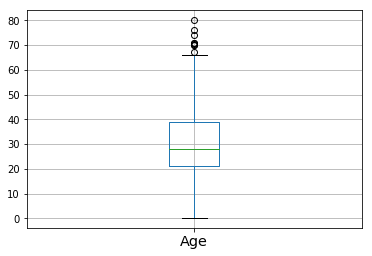

In [24]:
data.boxplot(column= "Age")

In [25]:
#Imputing Age - Separately for test and train
grouped_train = data2.iloc[:891].groupby(['Sex','Pclass','Salutation'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Salutation', 'Age']]
grouped_median_train.tail()

,Sex,Pclass,Salutation,Age
12,male,2,Master,1.0
13,male,2,Mr,31.0
14,male,2,Officer,46.5
15,male,3,Master,4.0
16,male,3,Mr,26.0


In [26]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Salutation'] == row['Salutation']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]

data2['Age'] = data2.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)

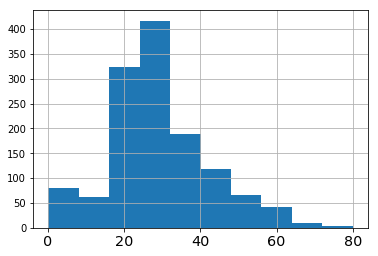

In [27]:
data2['Age'].hist()

In [28]:
#Binning Age
bins = [0,15,25,40,65,100]
groups = ['Children', 'Youth', 'Adult', 'MiddleAge','Seniors']
data2['Age_grp'] = pd.cut(data2['Age'], bins, labels= groups)
print(data2['Age_grp'].value_counts())
data2 = data2.drop(columns= 'Age')

Adult        570
Youth        378
MiddleAge    228
Children     123
Seniors       10
Name: Age_grp, dtype: int64


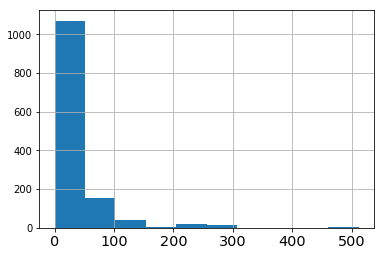

In [29]:
data2['Fare'].hist()

In [30]:
#Bins for Fare
tr = data2.iloc[:891,]

Fare_range = pd.qcut(tr['Fare'], 5)
print(Fare_range.value_counts())

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64


In [31]:
bins = [-0.1, 7.854,10.5,21.679,39.688,512.330]
group = [0,1,2,3,4]
data2['Fare_grp'] = pd.cut(data2['Fare'], bins, labels= group)
data2['Fare_grp'].value_counts()
data2 = data2.drop(columns= 'Fare')

In [32]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#enc = OneHotEncoder(sparse = False)


one_hot = pd.get_dummies(data2['Embarked'],prefix='Embarked')
p_class = pd.get_dummies(data2['Pclass'], prefix='Pclass')
sex = pd.get_dummies(data2['Sex'], prefix = 'Sex')
Salutation = pd.get_dummies(data2['Salutation'], prefix = 'Sal')
#Deck = pd.get_dummies(data2['Deck'], prefix = 'Deck')
Tick = pd.get_dummies(data2['Ticket_pref'], prefix = 'Tkt')
Age = pd.get_dummies(data2['Age_grp'], prefix = 'Age')
Fare = pd.get_dummies(data2['Fare_grp'], prefix = 'Fare')

In [33]:
comb = [one_hot, p_class, sex, Salutation,Tick,Age,Fare]
data3 = pd.concat(comb, axis = 1)
#data3.sample(10)
print(data2.shape)
print(data3.shape)
data2['SNO'] = 1
data3['SNO'] = 1
data2['SNO'] = data2['SNO'].cumsum()
data3['SNO'] = data3['SNO'].cumsum()
data4 = data2.merge(data3, left_on='SNO', right_on='SNO', how='inner')
data4.shape

(1309, 19)
(1309, 61)


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


(1309, 81)

In [34]:
data4.dtypes

Embarked           object
Parch               int64
PassengerId         int64
Pclass              int64
Sex                object
SibSp               int64
Survived          float64
Ticket             object
Dead              float64
Last_Name          object
Salutation         object
Deck               object
Family              int64
Single              int64
Small_Family        int64
Big_Family          int64
Ticket_pref        object
Age_grp          category
Fare_grp         category
SNO                 int64
Embarked_C          uint8
Embarked_Q          uint8
Embarked_S          uint8
Pclass_1            uint8
Pclass_2            uint8
Pclass_3            uint8
Sex_female          uint8
Sex_male            uint8
Sal_Master          uint8
Sal_Miss            uint8
                   ...   
Tkt_SC              uint8
Tkt_SCA3            uint8
Tkt_SCA4            uint8
Tkt_SCAH            uint8
Tkt_SCOW            uint8
Tkt_SCPARIS         uint8
Tkt_SCParis         uint8
Tkt_SOC     

In [35]:
prep = data4.drop(columns=['Fare_grp', 'Tkt_A', 'Sal_Miss', 'Sal_Mr', 'Sal_Master', 'Fare_4', 
'Tkt_A4',
'Tkt_AQ3',
'Tkt_AQ4',
'Tkt_AS',
'Tkt_C',
'Tkt_CASOTON',
'Tkt_FC',
'Tkt_FCC',
'Tkt_Fa',
'Tkt_LINE',
'Tkt_LP',
'Tkt_PP',
'Tkt_PPP',
'Tkt_SC',
'Tkt_SCA3',
'Tkt_SCA4',
'Tkt_SCAH',
'Tkt_SCOW',
'Tkt_SCPARIS',
'Tkt_SCParis',
'Tkt_SOC',
'Tkt_SOP',
'Tkt_SOPP',
'Tkt_SOTONO2',
'Tkt_SOTONOQ',
'Tkt_SP',
'Tkt_STONO',
'Tkt_STONO2',
'Tkt_STONOQ',
'Tkt_SWPP',
'Tkt_WC',
'Tkt_WEP','Age_grp','Age_Seniors','Fare_0','Embarked_S','Sex_male','Pclass_3','Sal_Officer','Tkt_XXX','Pclass','Dead','Parch','SibSp','Ticket_pref','Sex','Ticket','Embarked','Last_Name','Salutation','Deck','SNO','Family'], axis=1)
#,'Deck_U'
#,'Embarked_C','Pclass_3','Sex_female','Deck_A'
#'PassengerId'



In [36]:
prep.dtypes

PassengerId        int64
Survived         float64
Single             int64
Small_Family       int64
Big_Family         int64
Embarked_C         uint8
Embarked_Q         uint8
Pclass_1           uint8
Pclass_2           uint8
Sex_female         uint8
Sal_Mrs            uint8
Sal_Royalty        uint8
Tkt_A5             uint8
Tkt_CA             uint8
Tkt_PC             uint8
Age_Children       uint8
Age_Youth          uint8
Age_Adult          uint8
Age_MiddleAge      uint8
Fare_1             uint8
Fare_2             uint8
Fare_3             uint8
dtype: object

In [37]:
prep.sum()

PassengerId      857395.0
Survived            342.0
Single              790.0
Small_Family        437.0
Big_Family           82.0
Embarked_C          270.0
Embarked_Q          123.0
Pclass_1            323.0
Pclass_2            277.0
Sex_female          466.0
Sal_Mrs             197.0
Sal_Royalty           5.0
Tkt_A5               28.0
Tkt_CA               68.0
Tkt_PC               92.0
Age_Children        123.0
Age_Youth           378.0
Age_Adult           570.0
Age_MiddleAge       228.0
Fare_1              275.0
Fare_2              256.0
Fare_3              260.0
dtype: float64

In [38]:
#splitting new and train data
#chk = prep.loc[isnull(prep['Survived']) == True,]
chk = prep[pd.isnull(prep['Survived'])]
chk = chk.drop(columns=['Survived'], axis=1)
print(chk.shape)

#datis = prep.dropna(subset = ['Survived'], how = 'all', inplace= True)
prep = prep[prep['Survived'] >= 0]
prep = prep.drop(columns=['PassengerId'], axis=1)
print(prep.shape)
#df.dropna(subset=[1])
#df.dropna(subset=['EPS'], how='all', inplace = True)
#df = df[df.EPS >= 0]

(418, 21)
(891, 21)


In [39]:
prep.corr(method='spearman')


,Survived,Single,Small_Family,Big_Family,Embarked_C,Embarked_Q,Pclass_1,Pclass_2,Sex_female,Sal_Mrs,Sal_Royalty,Tkt_A5,Tkt_CA,Tkt_PC,Age_Children,Age_Youth,Age_Adult,Age_MiddleAge,Fare_1,Fare_2,Fare_3
Survived,1.000000,-0.203367,0.279855,-0.125147,0.168240,0.003650,0.285904,0.093349,0.543351,0.339040,0.033391,-0.092199,-0.019137,0.147062,0.136884,-0.005687,-0.085847,0.024854,-0.198067,0.043153,0.060373
Single,-0.203367,1.000000,-0.859931,-0.336825,-0.095298,0.086464,-0.113364,-0.039070,-0.303646,-0.365454,-0.000414,0.050549,-0.117245,-0.019783,-0.358790,0.053502,0.188261,-0.042835,0.338625,-0.145954,-0.217122
Small_Family,0.279855,-0.859931,1.000000,-0.190940,0.158586,-0.087093,0.168568,0.104546,0.260747,0.372029,0.011568,-0.029666,0.006430,0.041377,0.181151,-0.052569,-0.108224,0.073383,-0.279801,0.194048,0.081314
Big_Family,-0.125147,-0.336825,-0.190940,1.000000,-0.109274,-0.005620,-0.092945,-0.117721,0.102954,0.016535,-0.020544,-0.042488,0.213620,-0.038283,0.355838,-0.005918,-0.162413,-0.052993,-0.135075,-0.077273,0.267558
Embarked_C,0.168240,-0.095298,0.158586,-0.109274,1.000000,-0.148258,0.296423,-0.125416,0.082853,0.061395,0.079020,-0.074892,-0.105869,0.397139,0.034760,-0.061748,0.000506,0.042283,-0.201512,0.005520,-0.029439
Embarked_Q,0.003650,0.086464,-0.087093,-0.005620,-0.148258,1.000000,-0.155342,-0.127301,0.074115,-0.089739,-0.023105,-0.021454,-0.067548,-0.082643,-0.033890,0.089786,0.009040,-0.096346,-0.096489,-0.038317,-0.056012
Pclass_1,0.285904,-0.113364,0.168568,-0.092945,0.296423,-0.155342,1.000000,-0.288585,0.098013,0.088207,0.132798,-0.087887,-0.124239,0.475007,-0.133146,-0.147137,-0.031816,0.309898,-0.301390,-0.275681,0.130974
Pclass_2,0.093349,-0.039070,0.104546,-0.117721,-0.125416,-0.127301,-0.288585,1.000000,0.064746,0.121239,-0.038324,-0.079259,0.139384,-0.137080,0.009655,-0.026113,0.011441,0.006038,-0.111456,0.314612,0.183454
Sex_female,0.543351,-0.303646,0.260747,0.102954,0.082853,0.074115,0.098013,0.064746,1.000000,0.547600,0.007483,-0.083638,0.006179,0.073639,0.097669,0.129419,-0.175810,0.017444,-0.166584,0.099850,0.036281
Sal_Mrs,0.339040,-0.365454,0.372029,0.016535,0.061395,-0.089739,0.088207,0.121239,0.547600,1.000000,-0.030347,-0.020155,0.019250,0.046197,-0.111109,-0.111044,0.026079,0.196536,-0.145139,0.114970,0.061103


# PREDICTION

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, StratifiedKFold,train_test_split

C:\Users\sadha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
def model_comb(dat,modl):

    y = dat['Survived']
    x = dat
    x = x.drop('Survived', axis = 1)
    #Model fit
    modl.fit(x,y)
    
    #Model Predictions
    predictions = modl.predict(x)
    
    #Accuracy
    acc = 0
    acc = metrics.accuracy_score(predictions,y)
    print("Accuracy score: ", acc)
    
    #Kfold cross validation
    cf = KFold(dat.shape[0], n_folds= 5)
    acc_all = []
    for train, test in cf:
        x_tr = x.iloc[train,:]
        y_tr = y.iloc[train]
        
        modl.fit(x_tr, y_tr)
        pred = modl.predict(x_tr)
        
        x_ts = x.iloc[test, :]
        y_ts = y.iloc[test]
        
        acc_all.append(modl.score(x_ts,y_ts))
    
    print("Cross fold score : ", np.mean(acc_all))
    
    modl.fit(x,y)
    

In [299]:
#Logistic Regression
modl = LogisticRegression()
model_comb(prep,modl)

Accuracy score:  0.8170594837261503
Cross fold score :  0.8080848659845584


In [300]:
#Random Forest
modl = RandomForestClassifier()
model_comb(prep,modl)

Accuracy score:  0.8877665544332211
Cross fold score :  0.815956311593748


In [162]:
model = SelectFromModel(modl, prefit=True)
tr = prep.drop(columns= 'Survived')
train_reduced = model.transform(tr)
train_reduced = pd.DataFrame(train_reduced)
print(train_reduced.shape)

(891, 20)


In [163]:
test_reduced = pd.DataFrame(model.transform(chk))
print(test_reduced.shape)

(418, 20)


In [164]:
type(train_reduced)

pandas.core.frame.DataFrame

In [165]:

train_reduced['Survived'] = prep['Survived']


Accuracy score:  0.8877665544332211
Cross fold score :  0.8316364321134895


In [167]:
#Random Forest
modl = RandomForestClassifier()
model_comb(train_reduced,modl)

Accuracy score:  0.8922558922558923
Cross fold score :  0.8260310087251271


In [166]:
#Logistic Regression
modl = LogisticRegression()
model_comb(train_reduced,modl)

Accuracy score:  0.8305274971941639
Cross fold score :  0.8193019898311468


In [539]:
#Decision Tree Classifier
modl = DecisionTreeClassifier()
model_comb(prep,modl)

Accuracy score:  0.9337822671156004
Cross fold score :  0.8058753373925052


In [540]:
#KNN
modl = KNeighborsClassifier(n_neighbors= 5)
model_comb(prep,modl)

Accuracy score:  0.8451178451178452
Cross fold score :  0.7755508128805474


In [96]:
#Neural Network
modl = MLPClassifier()
model_comb(prep,modl)

C:\Users\sadha\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy score:  0.9079685746352413
Cross fold score :  0.822666499278137


In [84]:
#Gradient Boosting
modl = GradientBoostingClassifier()
model_comb(prep,modl)


Accuracy score:  0.8799102132435466
Cross fold score :  0.8260435628648548


In [409]:
chk.describe()

,Age,Fare,PassengerId,Dead,Single,Small_Family,Big_Family,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Sal_Master,Sal_Miss,Sal_Mr,Sal_Mrs,Sal_Officer,Sal_Royalty,Tkt_A,Tkt_A4,Tkt_A5,Tkt_AQ3,Tkt_AQ4,Tkt_AS,Tkt_C,Tkt_CA,Tkt_CASOTON,Tkt_FC,Tkt_FCC,Tkt_Fa,Tkt_LINE,Tkt_LP,Tkt_PC,Tkt_PP,Tkt_PPP,Tkt_SC,Tkt_SCA3,Tkt_SCA4,Tkt_SCAH,Tkt_SCOW,Tkt_SCPARIS,Tkt_SCParis,Tkt_SOC,Tkt_SOP,Tkt_SOPP,Tkt_SOTONO2,Tkt_SOTONOQ,Tkt_SP,Tkt_STONO,Tkt_STONO2,Tkt_STONOQ,Tkt_SWPP,Tkt_WC,Tkt_WEP,Tkt_XXX
count,418.000000,418.000000,418.000000,0.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.0,418.000000,418.000000,418.0,418.0,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000
mean,29.350478,35.576535,1100.500000,NaN,0.605263,0.346890,0.047847,0.244019,0.110048,0.645933,0.255981,0.222488,0.521531,0.363636,0.636364,0.016746,0.043062,0.083732,0.031100,0.021531,0.019139,0.002392,0.0,0.782297,0.050239,0.191388,0.574163,0.172249,0.011962,0.0,0.002392,0.007177,0.016746,0.002392,0.002392,0.0,0.007177,0.064593,0.0,0.004785,0.009569,0.0,0.0,0.002392,0.076555,0.002392,0.0,0.002392,0.002392,0.002392,0.004785,0.0,0.016746,0.002392,0.004785,0.0,0.009569,0.002392,0.021531,0.0,0.004785,0.002392,0.002392,0.0,0.011962,0.002392,0.708134
std,13.230491,55.850103,120.810458,NaN,0.489380,0.476551,0.213698,0.430019,0.313324,0.478803,0.436934,0.416416,0.500135,0.481622,0.481622,0.128474,0.203240,0.277317,0.173797,0.145320,0.137177,0.048912,0.0,0.413179,0.218700,0.393865,0.495062,0.378049,0.108844,0.0,0.048912,0.084514,0.128474,0.048912,0.048912,0.0,0.084514,0.246101,0.0,0.069088,0.097471,0.0,0.0,0.048912,0.266203,0.048912,0.0,0.048912,0.048912,0.048912,0.069088,0.0,0.128474,0.048912,0.069088,0.0,0.097471,0.048912,0.145320,0.0,0.069088,0.048912,0.048912,0.0,0.108844,0.048912,0.455166
min,0.170000,0.000000,892.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,21.250000,7.895800,996.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,26.000000,14.454200,1100.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000

In [214]:
chk_PID = pd.DataFrame(chk['PassengerId'])
chk = chk.drop(columns=['PassengerId'], axis=1)

In [159]:
chk_pred = pd.DataFrame(modl.predict(chk))
chk_pred.head()

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [168]:
chk_pred = pd.DataFrame(modl.predict(test_reduced))
chk_pred.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [169]:
chk_pred.to_csv("Result5", sep='\t')

In [73]:
chk_PID.tail()

,PassengerId
1304,1305
1305,1306
1306,1307
1307,1308
1308,1309


# HYPER PARAMETER TUNING

In [275]:
y = prep['Survived']
x = prep
x = x.drop('Survived', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=7)

In [276]:
parameter_grid = {
             'max_depth' : [6, 8, 10, 12],
             'n_estimators': [30, 20, 10],
             'max_features': ['sqrt', 'auto', 'log2'],
             'min_samples_split': [2, 5 , 7],
             'min_samples_leaf': [1,2, 3, 10],
             'bootstrap': [True, False],
             }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(forest,
                           scoring='accuracy',
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           verbose=1
                          )

grid_search.fit(x, y)
model = grid_search
parameters = grid_search.best_params_

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best score: 0.8417508417508418
Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed:  3.9min finished


In [277]:
parameters = {'bootstrap': False, 'min_samples_leaf': 2, 'n_estimators': 10, 
              'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 10}

model = RandomForestClassifier(**parameters)
model.fit(X_train, Y_train)
modl = model.fit(X_test, Y_test)

In [278]:
tresholds = np.sort(model.feature_importances_)
for tresh in tresholds:
    a = SelectFromModel(model, threshold = tresh, prefit=True)
    train_reduced = pd.DataFrame(a.transform(X_train))
    test_reduced = pd.DataFrame(a.transform(X_test))
    mmm =  RandomForestClassifier(**parameters)
    mmm.fit(train_reduced,Y_train)
    y_pred = mmm.predict(test_reduced)
    accuracy = metrics.accuracy_score(Y_test,y_pred)
    print("Threshold : ", tresh, "Accuracy : ", accuracy)

Threshold :  0.0 Accuracy :  0.8022388059701493
Threshold :  0.008702668571865196 Accuracy :  0.7873134328358209
Threshold :  0.009256478187315292 Accuracy :  0.7873134328358209
Threshold :  0.010903247245301093 Accuracy :  0.7947761194029851
Threshold :  0.01204798381038224 Accuracy :  0.7985074626865671
Threshold :  0.014827986421486975 Accuracy :  0.8097014925373134
Threshold :  0.01567337535456277 Accuracy :  0.7985074626865671
Threshold :  0.017233889600412233 Accuracy :  0.7910447761194029
Threshold :  0.020392179384125714 Accuracy :  0.7798507462686567
Threshold :  0.020790746306963617 Accuracy :  0.7873134328358209
Threshold :  0.022045841410378315 Accuracy :  0.7761194029850746
Threshold :  0.02635287025989986 Accuracy :  0.7798507462686567
Threshold :  0.026623774137416345 Accuracy :  0.7910447761194029
Threshold :  0.02792236579593273 Accuracy :  0.7835820895522388
Threshold :  0.028193497030069424 Accuracy :  0.7686567164179104
Threshold :  0.032345022877182245 Accuracy :  

In [280]:
tresholds

array([0.        , 0.00870267, 0.00925648, 0.01090325, 0.01204798,
       0.01482799, 0.01567338, 0.01723389, 0.02039218, 0.02079075,
       0.02204584, 0.02635287, 0.02662377, 0.02792237, 0.0281935 ,
       0.03234502, 0.03986209, 0.0474427 , 0.05485519, 0.06914706,
       0.08000948, 0.10953636, 0.12366461, 0.18217058])

In [279]:
a = SelectFromModel(model, threshold = 0.014827986421486975 , prefit=True)
train_reduced = pd.DataFrame(a.transform(X_train))
test_reduced = pd.DataFrame(a.transform(X_test))
mmm =  RandomForestClassifier(**parameters)
mmm.fit(train_reduced,Y_train)
y_pred = mmm.predict(test_reduced)
accuracy = metrics.accuracy_score(Y_test,y_pred)
print("Threshold : ", tresh, "Accuracy : ", accuracy)

Threshold :  0.18217058422647275 Accuracy :  0.7985074626865671


In [281]:
chk_PID = pd.DataFrame(chk['PassengerId'])
chk = chk.drop(columns=['PassengerId'], axis=1)


In [282]:
chk_pred = pd.DataFrame(model.predict(chk))
chk_pred.head()

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [283]:
chk_pred.to_csv("Result3", sep='\t')